In [1]:
!conda install -c conda-forge scikit-learn imbalanced-learn shap -y

Channels:
 - conda-forge
 - defaults
Platform: win-64
Solving environment: ...working... done

# All requested packages already installed.



STEP 1: Import Libraries


In [3]:

import pandas as pd # pandas: For data loading and manipulation
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # seaborn & matplotlib.pyplot: For data visualization.

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from imblearn.over_sampling import SMOTE
import shap


Import Libraries

In [121]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
import shap
import pandas as pd # pandas: For data loading and manipulation
import seaborn as sns # seaborn & matplotlib.pyplot: For data visualization.
import matplotlib.pyplot as plt 


STEP 2: Load Dataset

In [9]:

df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [4]:
# Make plots look nicer
sns.set(style="whitegrid", palette="muted", font_scale=1.1)
plt.rcParams["figure.figsize"] = (10, 6)

STEP 3: Initial Exploration

In [129]:
print("Shape of dataset:", df.shape)
print("\nData types and missing values:")
print(df.info()) # Dataset info: rows, columns, data types, missing values 
print("\nSummary statistics:") # Summary statistics for numerical columns 
print(df.describe())
print("\nFirst 5 Rows:\n", df.head()) 
# Check missing values 
print(df.isnull().sum()) 

Shape of dataset: (7043, 31)

Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   tenure                                 7043 non-null   int64  
 2   MonthlyCharges                         7043 non-null   float64
 3   TotalCharges                           7043 non-null   float64
 4   Churn                                  7043 non-null   int64  
 5   gender_Male                            7043 non-null   bool   
 6   Partner_Yes                            7043 non-null   bool   
 7   Dependents_Yes                         7043 non-null   bool   
 8   PhoneService_Yes                       7043 non-null   bool   
 9   MultipleLines_No phone service         7043 non-null   bool   
 10  MultipleLin

In [15]:
# Check target balance
print("\nClass distribution (Churn):")
print(df['Churn'].value_counts())


Class distribution (Churn):
Churn
No     5174
Yes    1869
Name: count, dtype: int64


In [79]:
# Encode categorical variables safely
if 'customerID' in df.columns:
    df = pd.get_dummies(df.drop('customerID', axis=1), drop_first=True)
else:
    df = pd.get_dummies(df, drop_first=True)


# Encode categorical variables (ignore if column is missing)
df = pd.get_dummies(df.drop('customerID', axis=1, errors='ignore'), drop_first=True)

# Before encoding
print("Columns before encoding:")
print(df.columns.tolist())

# After encoding
df_encoded = pd.get_dummies(df.drop('customerID', axis=1, errors='ignore'), drop_first=True)

print("\nColumns after encoding:")
print(df_encoded.columns.tolist())

Columns before encoding:
['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn', 'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']

Columns after encoding:
['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn', 'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes', 'MultipleLines_No phone service', 'Multiple

Categorical columns before encoding:
[]

Columns after encoding:
['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn', 'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']

✅ Cleaned and encoded data saved as 'cleaned_telco_churn.csv'.

Number of columns before encoding: 31
Number of columns after encoding: 31


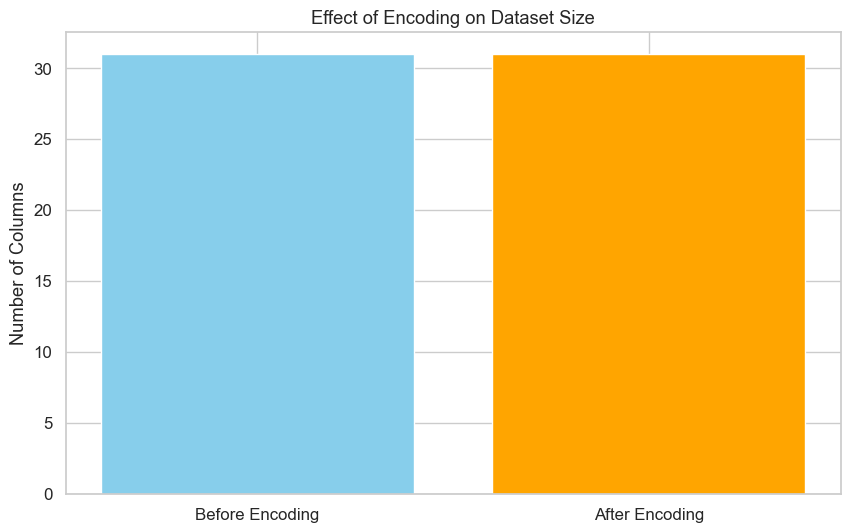

In [85]:
# Show categorical columns before encoding
print("Categorical columns before encoding:")
print(df.select_dtypes(include=['object']).columns.tolist())

# Apply encoding (ignore if 'customerID' is missing)
df_encoded = pd.get_dummies(df.drop('customerID', axis=1, errors='ignore'), drop_first=True)

# Show all columns after encoding
print("\nColumns after encoding:")
print(df_encoded.columns.tolist())

# 14. Save Cleaned & Encoded Dataset for Modeling
df_encoded.to_csv('cleaned_telco_churn.csv', index=False)
print("\n✅ Cleaned and encoded data saved as 'cleaned_telco_churn.csv'.")

# Optional: Compare number of columns before vs after
print(f"\nNumber of columns before encoding: {df.shape[1]}")
print(f"Number of columns after encoding: {df_encoded.shape[1]}")

# Optional visualisation of column expansion
import matplotlib.pyplot as plt

plt.bar(['Before Encoding','After Encoding'], [df.shape[1], df_encoded.shape[1]], color=['skyblue','orange'])
plt.ylabel("Number of Columns")
plt.title("Effect of Encoding on Dataset Size")
plt.show()


In [17]:
# STEP 4: Visual EDA

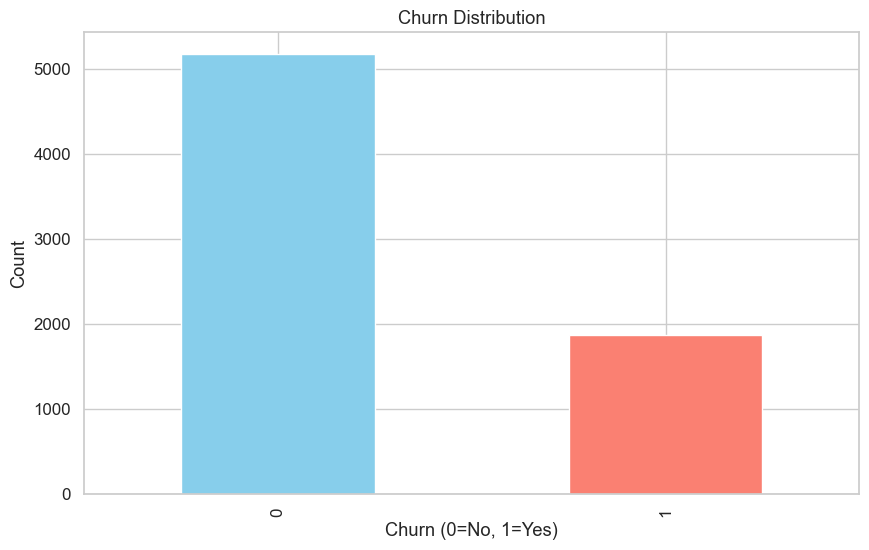

In [131]:
# Bar chart: Churn distribution
df['Churn'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Churn Distribution")
plt.xlabel("Churn (0=No, 1=Yes)")
plt.ylabel("Count")
plt.show()

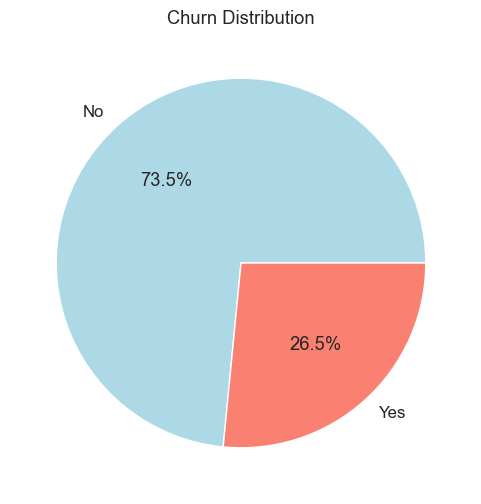

In [25]:
# Pie chart
df['Churn'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightblue','salmon'], figsize=(6,6))
plt.title('Churn Distribution')
plt.ylabel('')
plt.show()

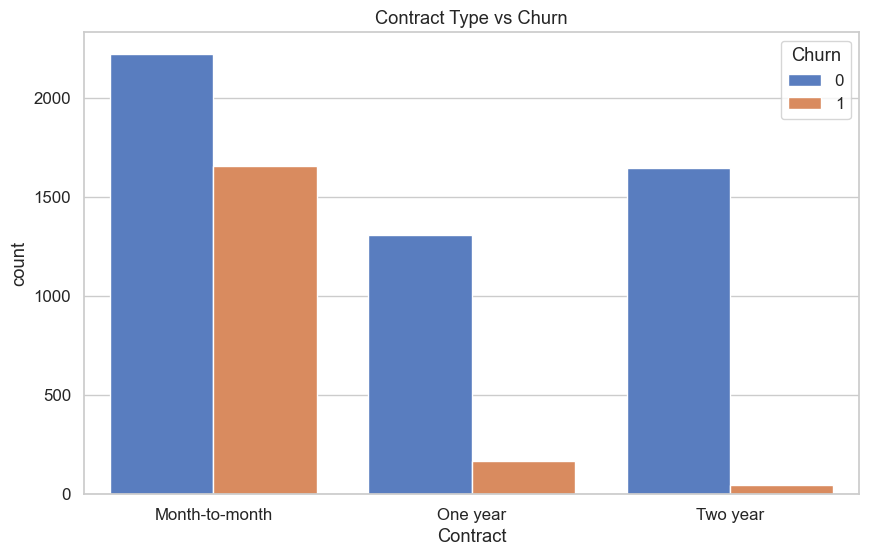

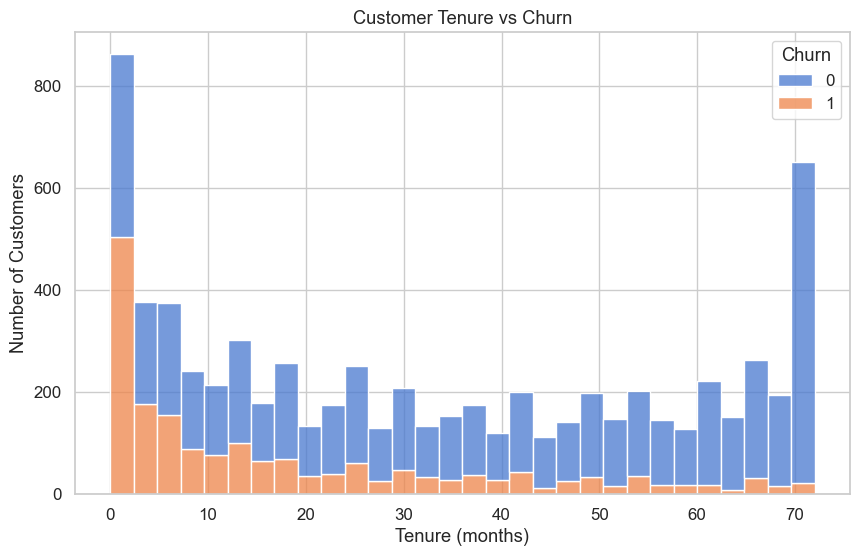

C:\Users\FUNMILAYO ITUAH\AppData\Local\Temp\ipykernel_19568\953675917.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='tenure', data=df, palette='Set1')


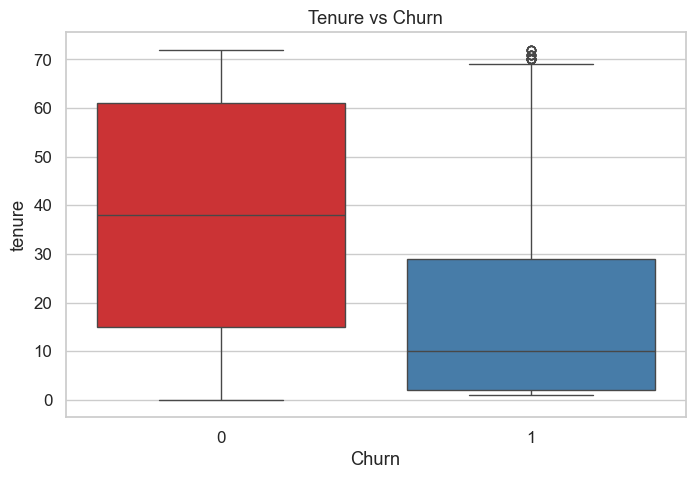

In [147]:

# Contract type vs churn
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title('Contract Type vs Churn')
plt.show()
# Tenure vs Churn
sns.histplot(data=df, x='tenure', hue='Churn', bins=30, multiple='stack')
plt.title('Customer Tenure vs Churn')
plt.xlabel('Tenure (months)')
plt.ylabel('Number of Customers')
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x='Churn', y='tenure', data=df, palette='Set1')
plt.title("Tenure vs Churn")
plt.show()

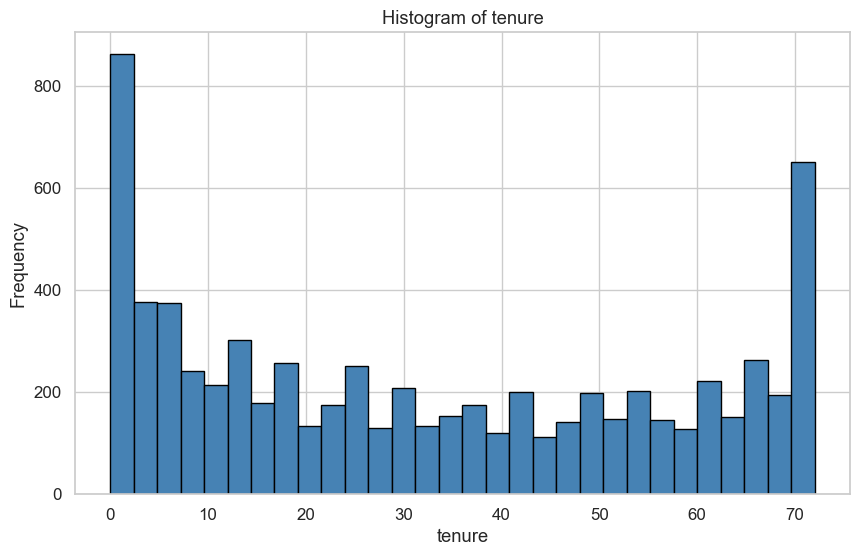

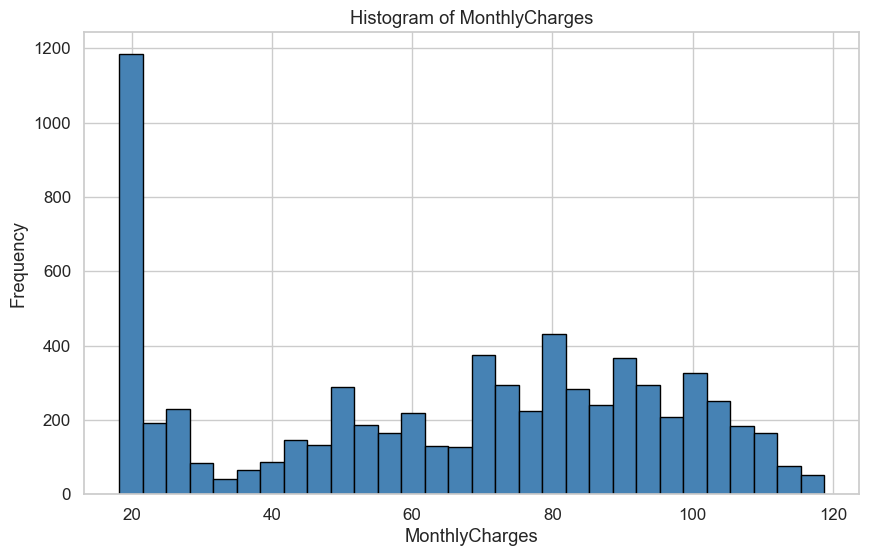

In [27]:
# Histogram: Numerical features
num_cols = ['tenure', 'MonthlyCharges']
for col in num_cols:
    plt.hist(df[col], bins=30, color='steelblue', edgecolor='black')
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

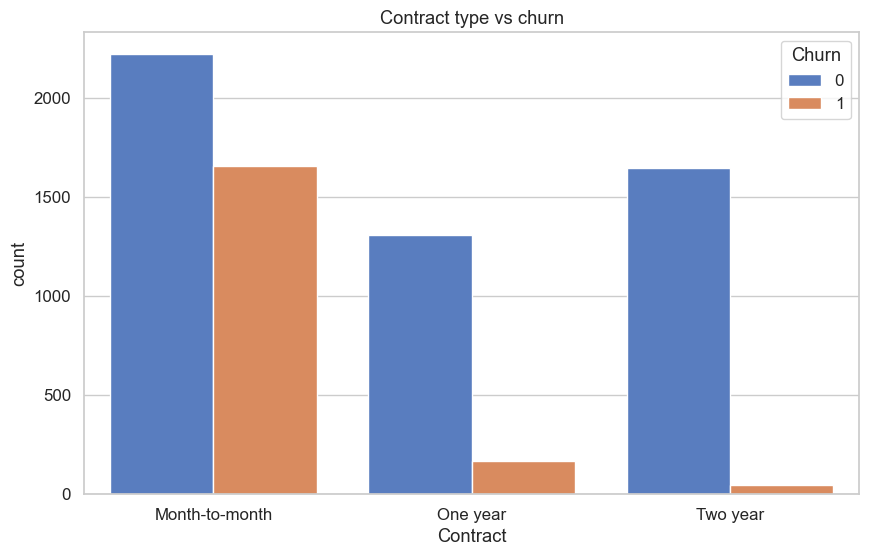

In [69]:

df['Contract'] = 'Month-to-month'
df.loc[df['Contract_One year'] == 1, 'Contract'] = 'One year'
df.loc[df['Contract_Two year'] == 1, 'Contract'] = 'Two year'

# Now plot
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title('Contract type vs churn')
plt.show()

Key Insights

Tenure vs Churn

Customers with shorter tenure (low months) are far more likely to churn.

Longer-tenure customers tend to stay loyal (low churn).

Monthly Charges vs Churn

Churn is higher among customers with higher monthly charges.

Lower monthly charges correlate with retention.

Total Charges vs Tenure

As expected, Total Charges increase linearly with tenure (customers who stay longer accumulate higher total bills).

However, churned customers cluster in the low-tenure & low total charge group.

Cluster Patterns

Two distinct groups appear:

High-risk churners → short tenure, high monthly charges, low total charges.

Low-risk customers → long tenure, moderate monthly charges, high total charges.

Business Implications

Retention Strategy: Focus on new customers in the first few months — they’re most likely to churn.

Pricing Strategy: Customers with higher monthly bills need better perceived value (bundles, discounts, or loyalty perks).

Customer Segmentation:

Segment 1: At risk → short tenure, high monthly charges.

Segment 2: Stable/loyal → long tenure, steady charges.

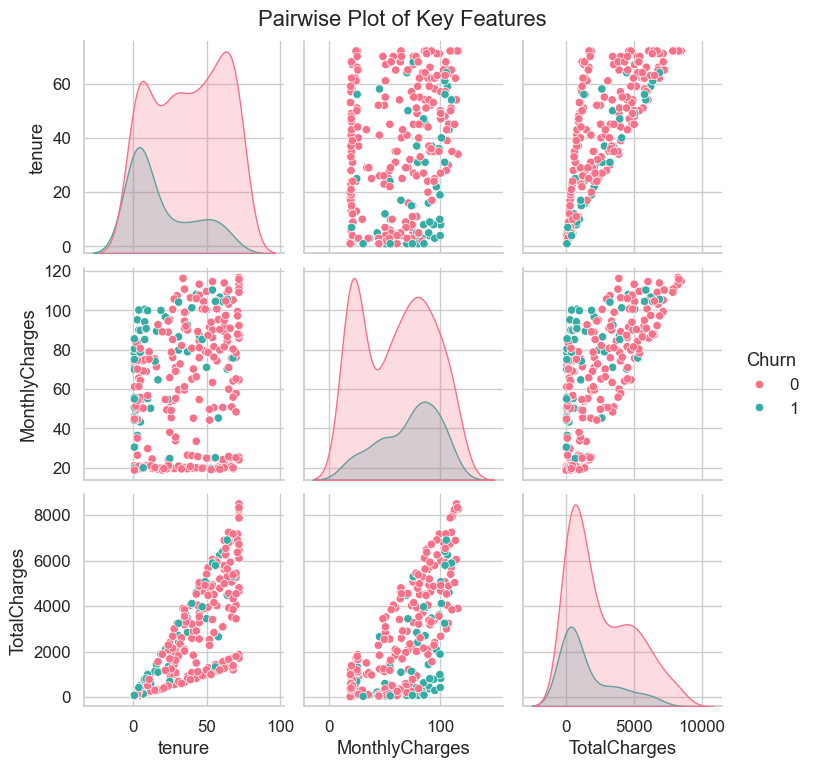

In [67]:
# Define numeric features for pairplot
num_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Pairplot (sampled for speed)
sns.pairplot(df.sample(300), hue='Churn', vars=num_features, diag_kind="kde", palette="husl")
plt.suptitle("Pairwise Plot of Key Features", y=1.02)
plt.show()

C:\Users\FUNMILAYO ITUAH\AppData\Local\Temp\ipykernel_19568\66650849.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df, palette="Set2")


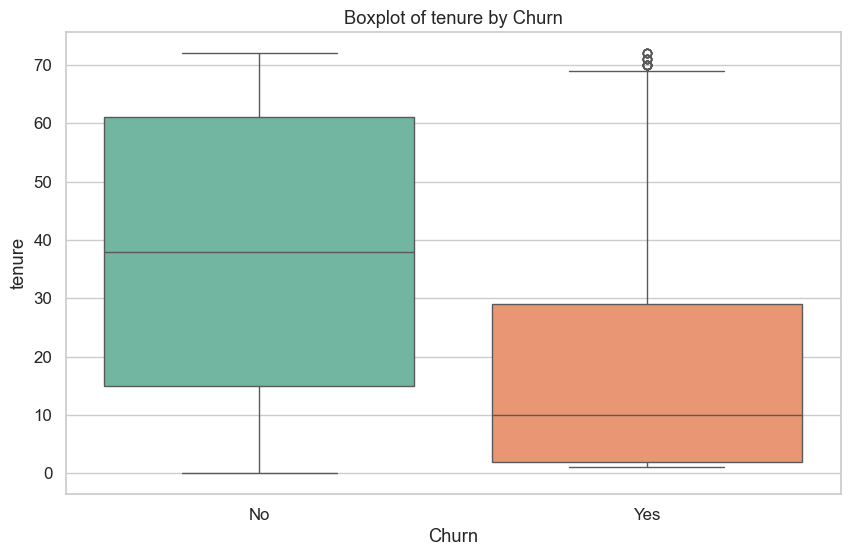

C:\Users\FUNMILAYO ITUAH\AppData\Local\Temp\ipykernel_19568\66650849.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df, palette="Set2")


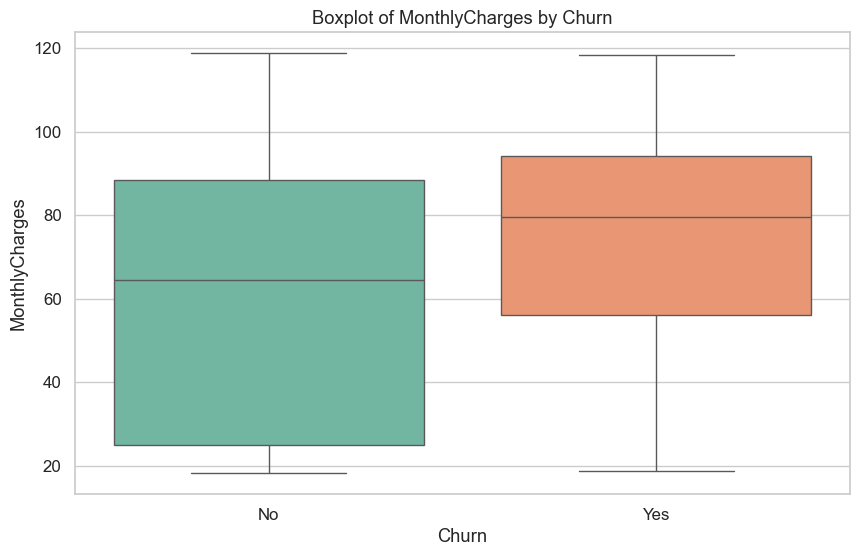

In [31]:
# Boxplots: Numerical vs Churn
for col in num_cols:
    sns.boxplot(x='Churn', y=col, data=df, palette="Set2")
    plt.title(f"Boxplot of {col} by Churn")
    plt.show()

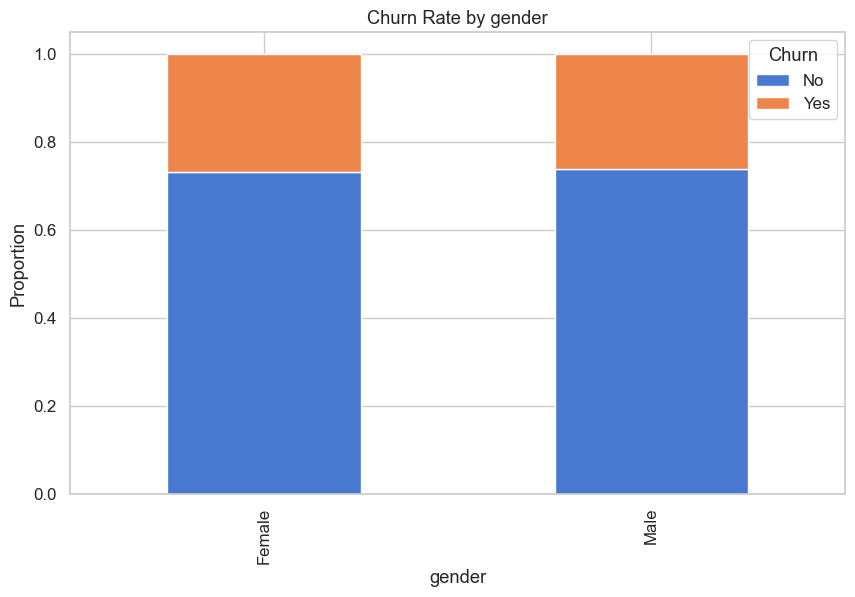

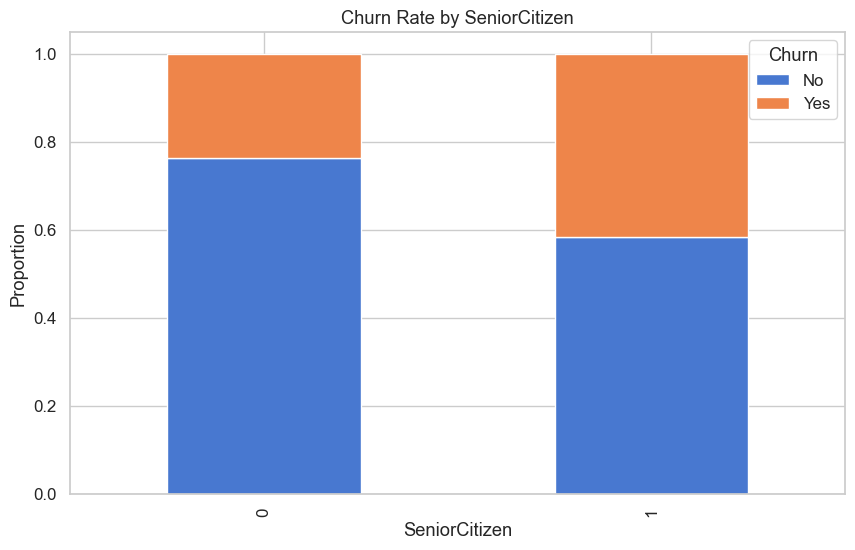

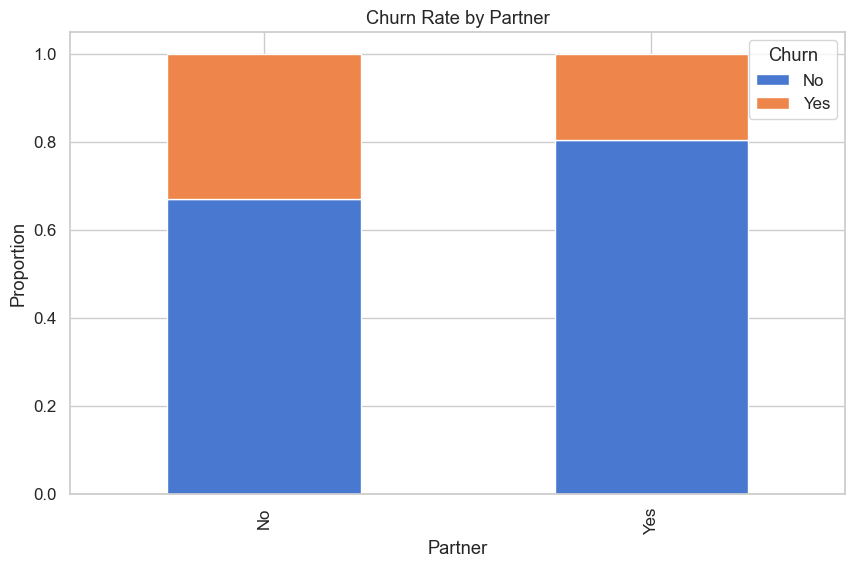

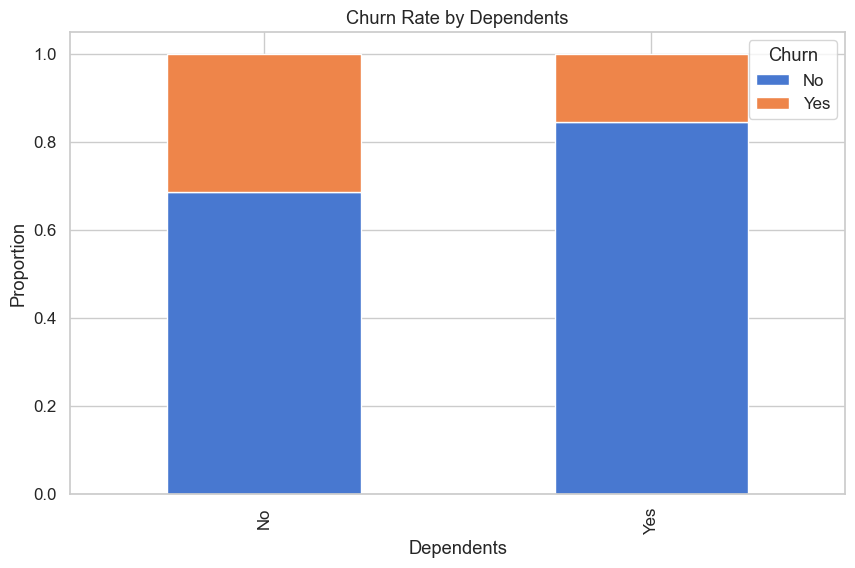

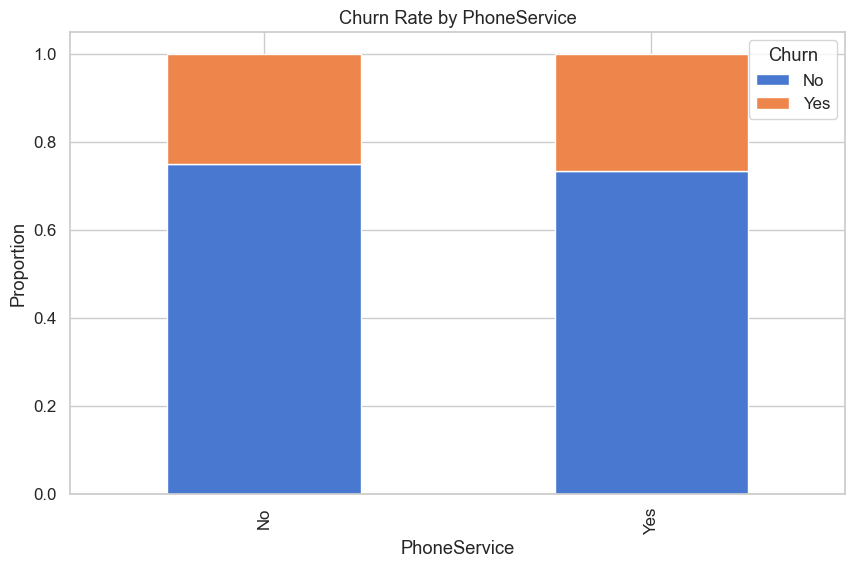

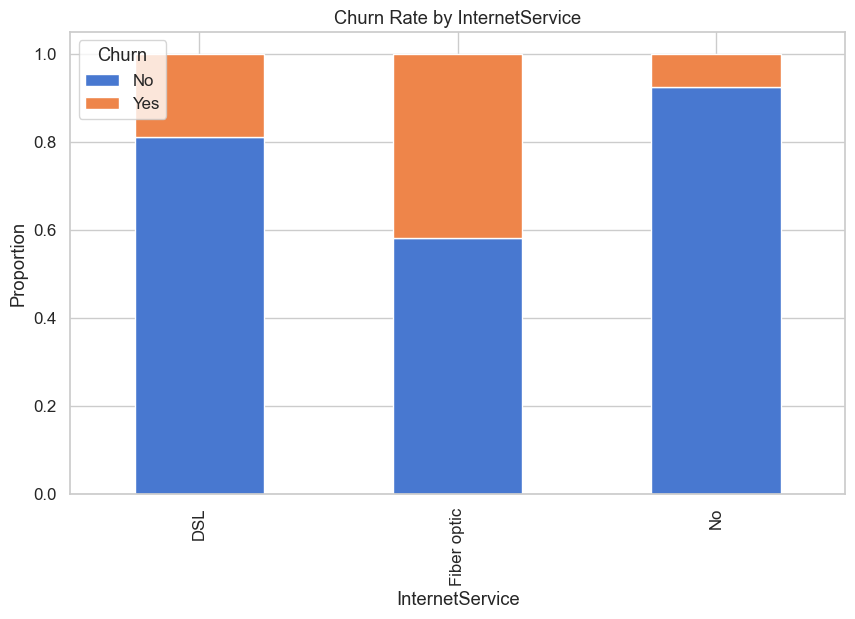

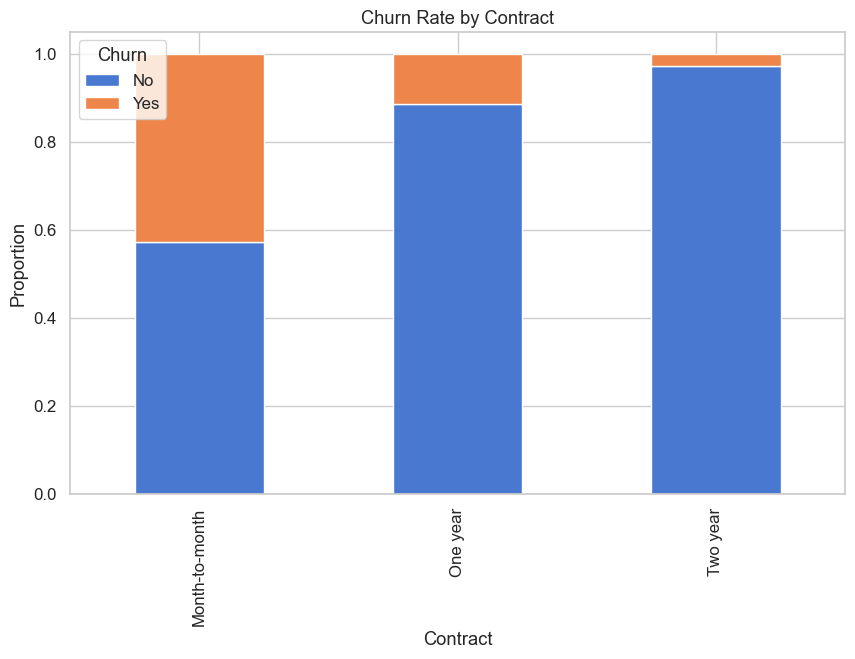

In [35]:
# Bar chart: Categorical features vs Churn
cat_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'InternetService', 'Contract']
for col in cat_cols:
    churn_rate = df.groupby(col)['Churn'].value_counts(normalize=True).unstack().fillna(0)
    churn_rate.plot(kind='bar', stacked=True)
    plt.title(f"Churn Rate by {col}")
    plt.ylabel("Proportion")
    plt.show()

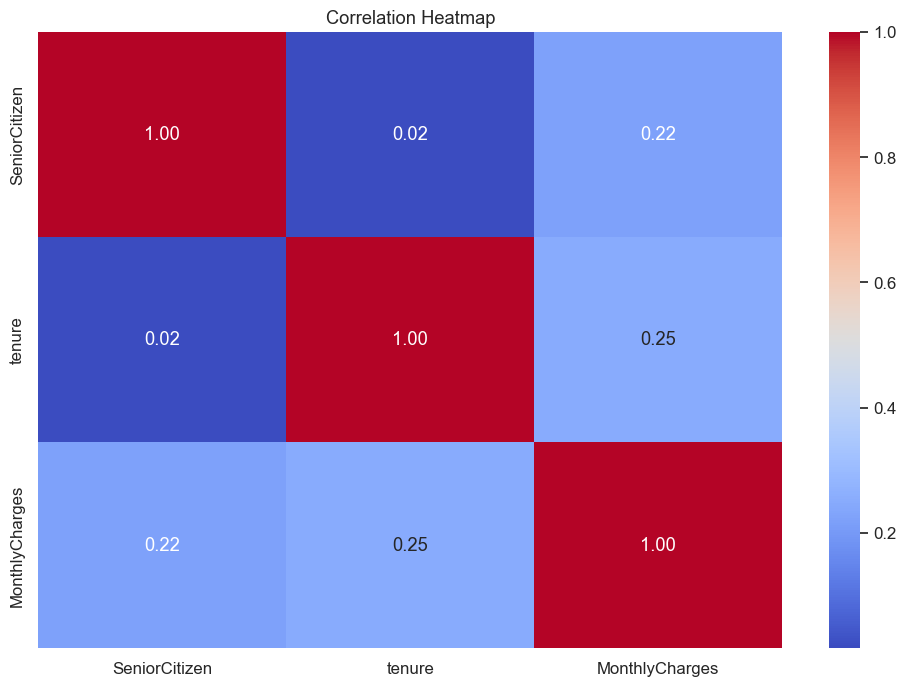

In [37]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


STEP 5: Data Preprocessing

In [41]:
# Convert TotalCharges to numeric and handle missing values
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Encode target variable
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Encode categorical variables
df = pd.get_dummies(df.drop('customerID', axis=1), drop_first=True)

C:\Users\FUNMILAYO ITUAH\AppData\Local\Temp\ipykernel_19568\3467066425.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


STEP 6: Train-Test Split

In [154]:
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42)


STEP 7: Handle Imbalance and Scaling

In [152]:
# Handle Imbalance
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)


# Scaling
scaler = StandardScaler()
X_train_res = scaler.fit_transform(X_train_res)
X_test = scaler.transform(X_test)

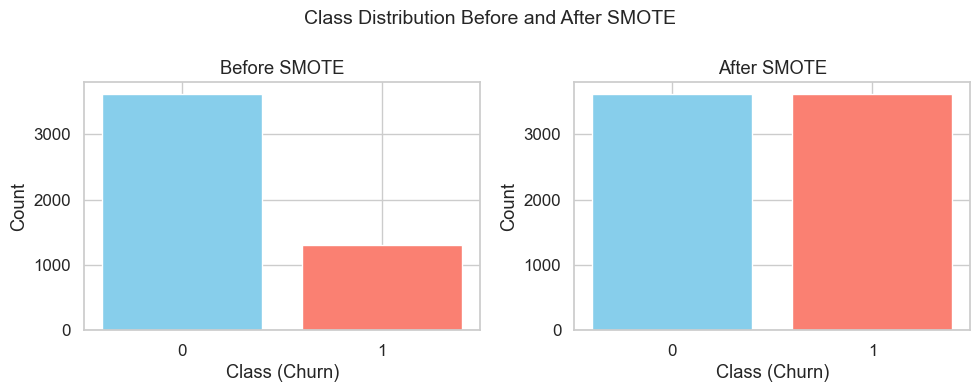

In [107]:
import matplotlib.pyplot as plt

# Count class distribution before & after SMOTE
before_counts = y_train.value_counts()
after_counts = y_train_res.value_counts()

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Before SMOTE
ax[0].bar(before_counts.index.astype(str), before_counts.values, color=['skyblue', 'salmon'])
ax[0].set_title("Before SMOTE")
ax[0].set_xlabel("Class (Churn)")
ax[0].set_ylabel("Count")

# After SMOTE
ax[1].bar(after_counts.index.astype(str), after_counts.values, color=['skyblue', 'salmon'])
ax[1].set_title("After SMOTE")
ax[1].set_xlabel("Class (Churn)")
ax[1].set_ylabel("Count")

plt.suptitle("Class Distribution Before and After SMOTE", fontsize=14)
plt.tight_layout()
plt.show()

STEP 8: Define Models

In [160]:

rf = RandomForestClassifier(random_state=42)
lr = LogisticRegression(max_iter=1000, random_state=42)
svm = SVC(probability=True, random_state=42)

# Train Random Forest with fixed random state
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_res, y_train_res)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


STEP 9: Hyperparameter Tuning

In [53]:

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Random Forest
param_rf = {'n_estimators':[100,200],
            'max_depth':[10,20,None],
            'min_samples_split':[2,5]}
grid_rf = GridSearchCV(rf, param_rf, cv=cv, scoring='roc_auc', n_jobs=-1)
grid_rf.fit(X_train_res, y_train_res)
best_rf = grid_rf.best_estimator_

# Logistic Regression
param_lr = {'C':[0.01,0.1,1,10]}
grid_lr = GridSearchCV(lr, param_lr, cv=cv, scoring='roc_auc', n_jobs=-1)
grid_lr.fit(X_train_res, y_train_res)
best_lr = grid_lr.best_estimator_

# SVM
param_svm = {'C':[0.1,1,10], 'kernel':['linear','rbf']}
grid_svm = GridSearchCV(svm, param_svm, cv=cv, scoring='roc_auc', n_jobs=-1)
grid_svm.fit(X_train_res, y_train_res)
best_svm = grid_svm.best_estimator_


STEP 10: Evaluation ROC Curve Comparison (RF, LR, SVM) - Purpose: Compare models’ discrimination ability.

C:\Users\FUNMILAYO ITUAH\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\FUNMILAYO ITUAH\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\FUNMILAYO ITUAH\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\FUNMILAYO ITUAH\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(



Random Forest Results:
              precision    recall  f1-score   support

           0       0.73      1.00      0.85      1552
           1       0.33      0.00      0.01       561

    accuracy                           0.73      2113
   macro avg       0.53      0.50      0.43      2113
weighted avg       0.63      0.73      0.62      2113

Confusion Matrix:
 [[1548    4]
 [ 559    2]]
ROC-AUC: 0.6129265670654391

Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.48      0.15      0.23      1552
           1       0.19      0.54      0.28       561

    accuracy                           0.25      2113
   macro avg       0.33      0.35      0.25      2113
weighted avg       0.40      0.25      0.24      2113

Confusion Matrix:
 [[ 233 1319]
 [ 256  305]]
ROC-AUC: 0.3298664709557675


C:\Users\FUNMILAYO ITUAH\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
C:\Users\FUNMILAYO ITUAH\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(



SVM Results:
              precision    recall  f1-score   support

           0       0.48      0.15      0.23      1552
           1       0.19      0.54      0.28       561

    accuracy                           0.25      2113
   macro avg       0.33      0.35      0.25      2113
weighted avg       0.40      0.25      0.24      2113

Confusion Matrix:
 [[ 233 1319]
 [ 257  304]]
ROC-AUC: 0.345653701968135


C:\Users\FUNMILAYO ITUAH\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\FUNMILAYO ITUAH\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\FUNMILAYO ITUAH\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


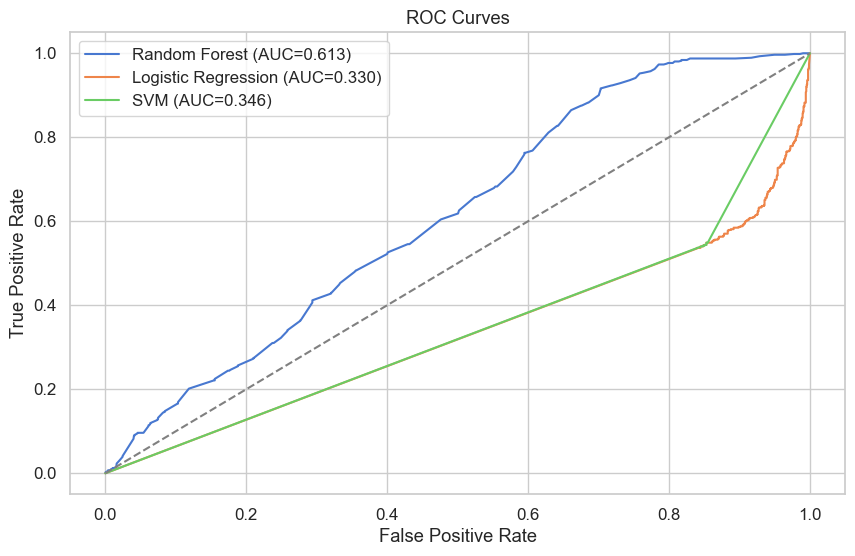


Summary of Model Performance:
                 Model   ROC-AUC
0        Random Forest  0.612927
1  Logistic Regression  0.329866
2                  SVM  0.345654


In [101]:

models = {
    "Random Forest": best_rf,
    "Logistic Regression": best_lr,
    "SVM": best_svm
}

results = []
for name, model in models.items():
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1] if hasattr(model, "predict_proba") else model.decision_function(X_test)
    
    auc = roc_auc_score(y_test, y_prob)
    print(f"\n{name} Results:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("ROC-AUC:", auc)
    
    results.append([name, auc])

# ROC Curves
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1] if hasattr(model, "predict_proba") else model.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC={roc_auc_score(y_test,y_prob):.3f})")

plt.plot([0,1],[0,1],'--',color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.show()

# Results summary
results_df = pd.DataFrame(results, columns=["Model","ROC-AUC"])
print("\nSummary of Model Performance:")
print(results_df)


Random Forest
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1552
           1       0.63      0.50      0.56       561

    accuracy                           0.79      2113
   macro avg       0.73      0.70      0.71      2113
weighted avg       0.78      0.79      0.78      2113

Confusion Matrix:
 [[1388  164]
 [ 282  279]]


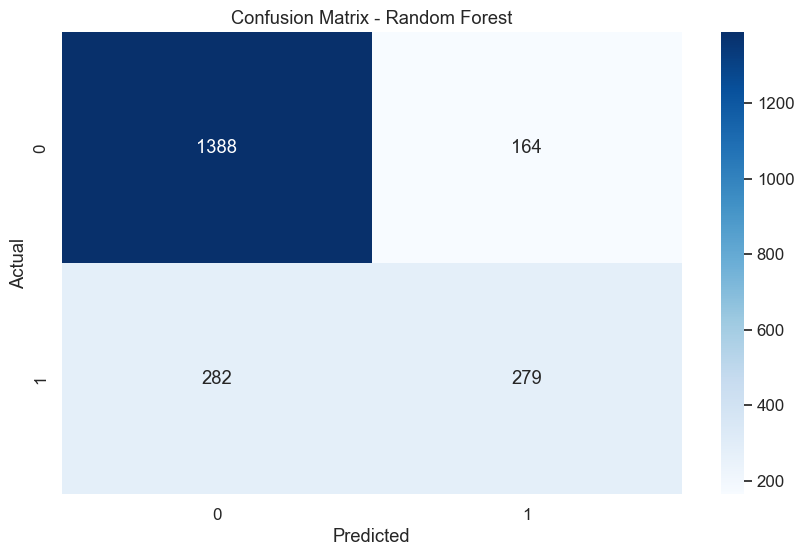

C:\Users\FUNMILAYO ITUAH\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1552
           1       0.67      0.56      0.61       561

    accuracy                           0.81      2113
   macro avg       0.76      0.73      0.74      2113
weighted avg       0.80      0.81      0.80      2113

Confusion Matrix:
 [[1398  154]
 [ 247  314]]


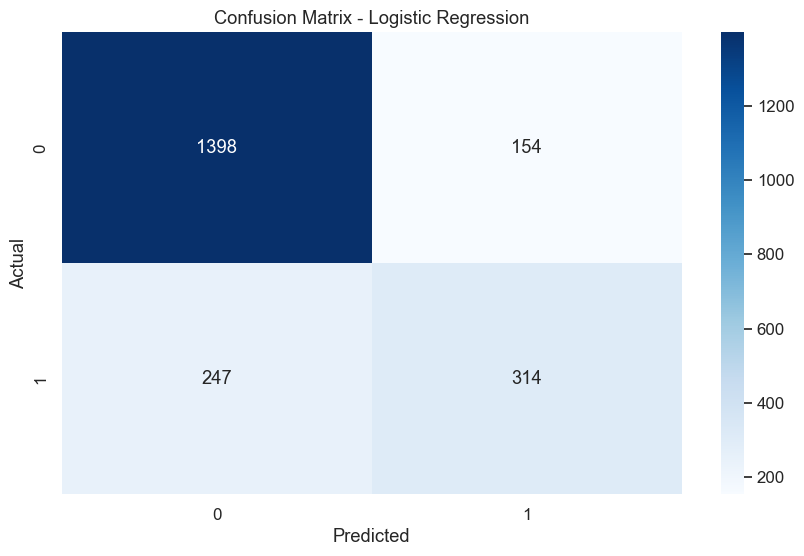


SVM
              precision    recall  f1-score   support

           0       0.73      1.00      0.85      1552
           1       0.00      0.00      0.00       561

    accuracy                           0.73      2113
   macro avg       0.37      0.50      0.42      2113
weighted avg       0.54      0.73      0.62      2113

Confusion Matrix:
 [[1552    0]
 [ 561    0]]


C:\Users\FUNMILAYO ITUAH\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\FUNMILAYO ITUAH\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\FUNMILAYO ITUAH\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"

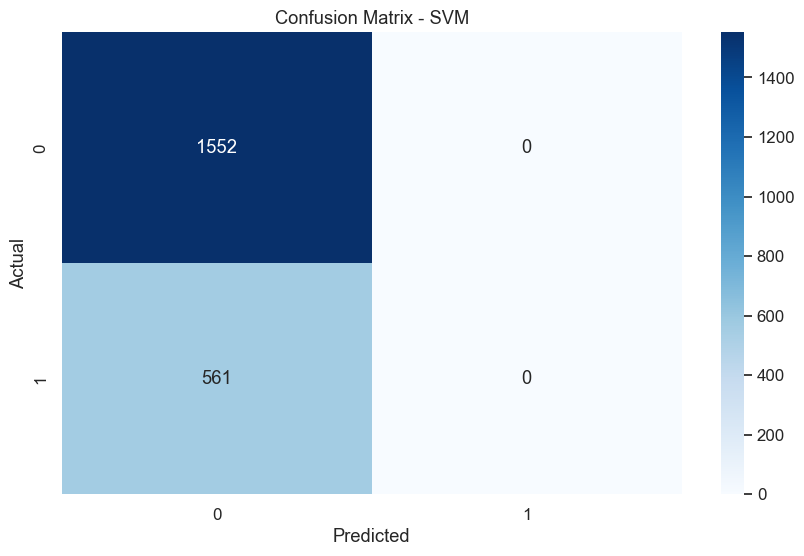

In [109]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
    results[name] = {"Accuracy": acc, "AUC": auc}
    
    print(f"\n{name}")
    print(classification_report(y_test, y_pred))
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", cm)
    
    # Optional: visualisation
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


Model: Random Forest
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1552
           1       0.63      0.50      0.56       561

    accuracy                           0.79      2113
   macro avg       0.73      0.70      0.71      2113
weighted avg       0.78      0.79      0.78      2113

Confusion Matrix:
[[1388  164]
 [ 282  279]]


C:\Users\FUNMILAYO ITUAH\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1552
           1       0.67      0.56      0.61       561

    accuracy                           0.81      2113
   macro avg       0.76      0.73      0.74      2113
weighted avg       0.80      0.81      0.80      2113

Confusion Matrix:
[[1398  154]
 [ 247  314]]


C:\Users\FUNMILAYO ITUAH\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\FUNMILAYO ITUAH\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\FUNMILAYO ITUAH\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.


Model: SVM
              precision    recall  f1-score   support

           0       0.73      1.00      0.85      1552
           1       0.00      0.00      0.00       561

    accuracy                           0.73      2113
   macro avg       0.37      0.50      0.42      2113
weighted avg       0.54      0.73      0.62      2113

Confusion Matrix:
[[1552    0]
 [ 561    0]]

📊 Model Comparison Table:
                     Accuracy  Precision    Recall  F1-score   ROC-AUC
Logistic Regression  0.810222   0.670940  0.559715  0.610301  0.844896
Random Forest        0.788926   0.629797  0.497326  0.555777  0.820065
SVM                  0.734501   0.000000  0.000000  0.000000  0.792779


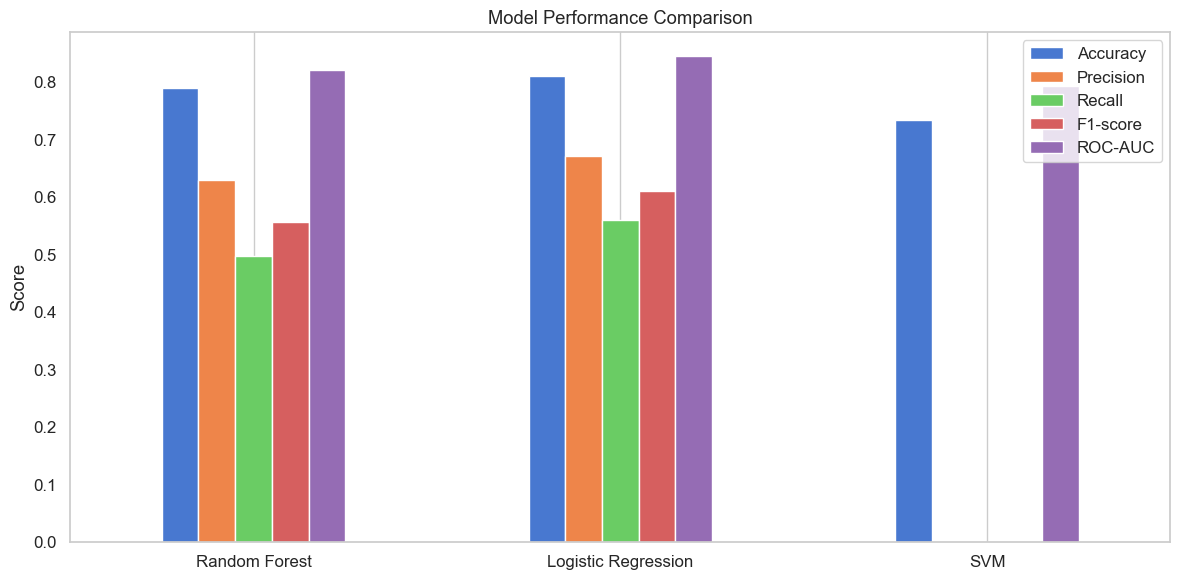

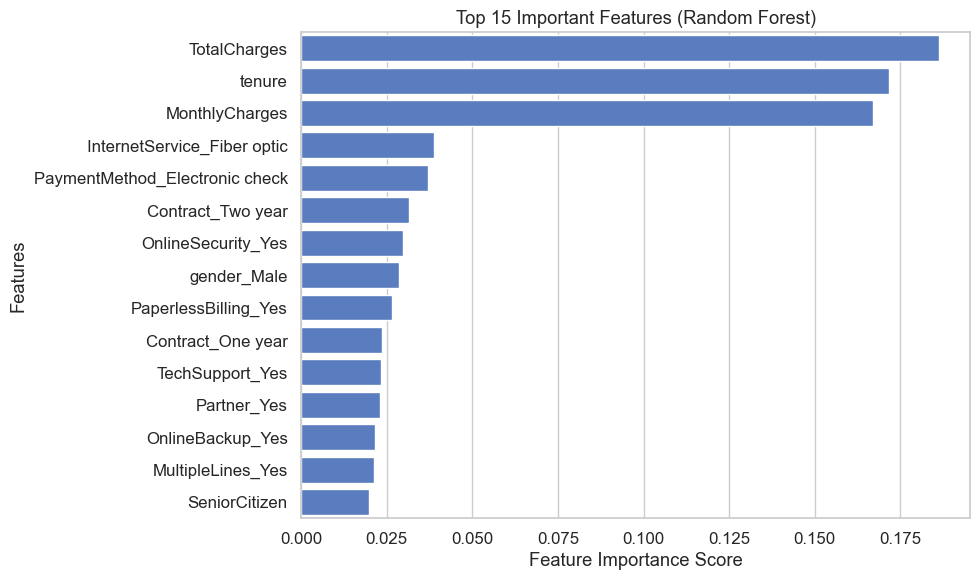

In [103]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Dictionary to store all results
results = {}

# Initialize models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(probability=True)
}

# Train, Predict, and Evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-score': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, y_proba)
    }

    print(f"\nModel: {name}")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

# Compare results in a table
results_df = pd.DataFrame(results).T
print("\n📊 Model Comparison Table:")
print(results_df.sort_values(by="ROC-AUC", ascending=False))

# Plot comparison
results_df.plot(kind='bar', figsize=(12,6), title='Model Performance Comparison')
plt.xticks(rotation=0)
plt.ylabel("Score")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Feature Importance (Random Forest Only)
rf_model = models['Random Forest']
importances = rf_model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

# Top 15 features
top_n = 15
plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices][:top_n], y=features[indices][:top_n])
plt.title("Top 15 Important Features (Random Forest)")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


Model: Random Forest
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1552
           1       0.63      0.50      0.56       561

    accuracy                           0.79      2113
   macro avg       0.73      0.70      0.71      2113
weighted avg       0.78      0.79      0.78      2113

Confusion Matrix:
[[1388  164]
 [ 282  279]]


C:\Users\FUNMILAYO ITUAH\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1552
           1       0.67      0.56      0.61       561

    accuracy                           0.81      2113
   macro avg       0.76      0.73      0.74      2113
weighted avg       0.80      0.81      0.80      2113

Confusion Matrix:
[[1398  154]
 [ 247  314]]


C:\Users\FUNMILAYO ITUAH\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\FUNMILAYO ITUAH\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\FUNMILAYO ITUAH\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.


Model: SVM
              precision    recall  f1-score   support

           0       0.73      1.00      0.85      1552
           1       0.00      0.00      0.00       561

    accuracy                           0.73      2113
   macro avg       0.37      0.50      0.42      2113
weighted avg       0.54      0.73      0.62      2113

Confusion Matrix:
[[1552    0]
 [ 561    0]]

📊 Model Comparison Table:
                     Accuracy  Precision    Recall  F1-score   ROC-AUC
Logistic Regression  0.810222   0.670940  0.559715  0.610301  0.844896
Random Forest        0.788926   0.629797  0.497326  0.555777  0.820065
SVM                  0.734501   0.000000  0.000000  0.000000  0.792778


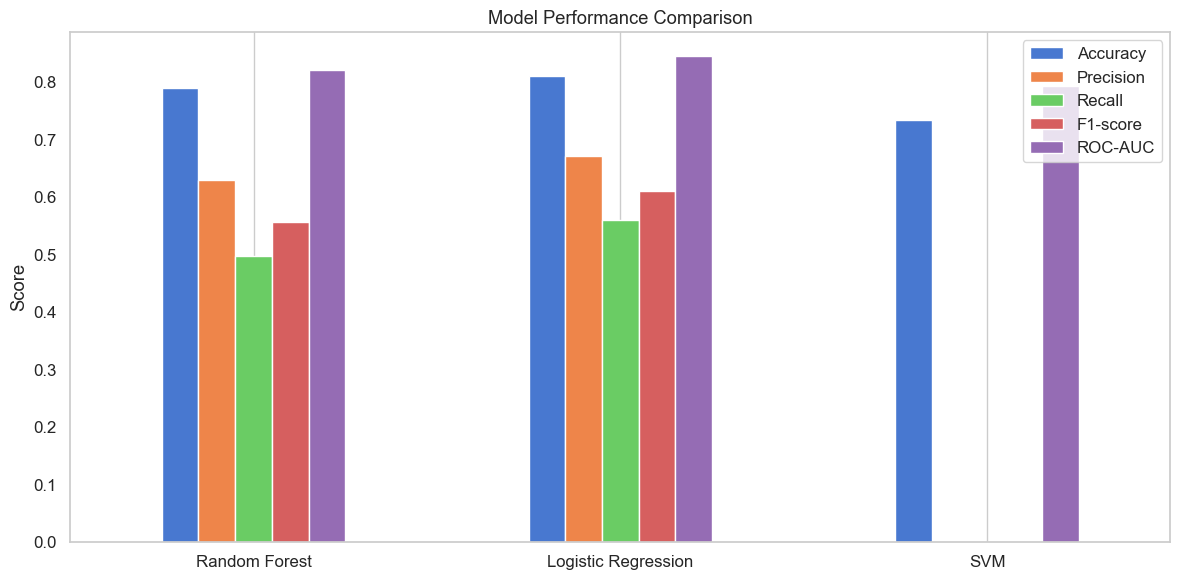

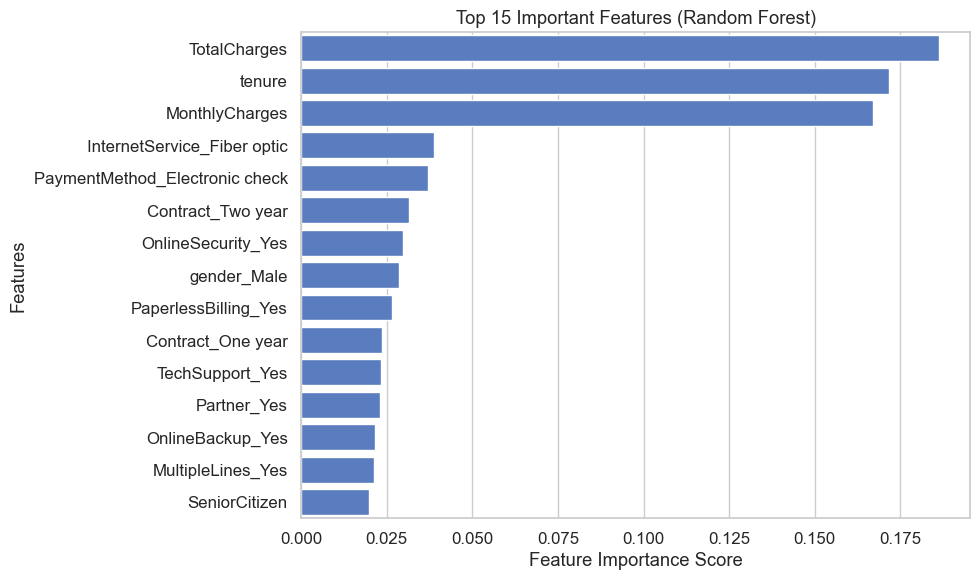

In [105]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Dictionary to store all results
results = {}

# Initialize models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(probability=True)
}

# Train, Predict, and Evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-score': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, y_proba)
    }

    print(f"\nModel: {name}")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

# Compare results in a table
results_df = pd.DataFrame(results).T
print("\n📊 Model Comparison Table:")
print(results_df.sort_values(by="ROC-AUC", ascending=False))

# Plot comparison
results_df.plot(kind='bar', figsize=(12,6), title='Model Performance Comparison')
plt.xticks(rotation=0)
plt.ylabel("Score")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Feature Importance (Random Forest Only)
rf_model = models['Random Forest']
importances = rf_model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

# Top 15 features
top_n = 15
plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices][:top_n], y=features[indices][:top_n])
plt.title("Top 15 Important Features (Random Forest)")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

In [115]:
# Model Performance Table - Purpose: Shows all key metrics in one table.

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

models = {'RF': best_rf, 'LR': best_lr, 'SVM': best_svm}
performance = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1]
    performance.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-score': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, y_proba)
    })

perf_df = pd.DataFrame(performance)
print(perf_df)

C:\Users\FUNMILAYO ITUAH\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\FUNMILAYO ITUAH\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\FUNMILAYO ITUAH\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\FUNMILAYO ITUAH\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\FUNMILAYO ITUAH\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but SVC was fitted withou

  Model  Accuracy  Precision    Recall  F1-score   ROC-AUC
0    RF  0.733554   0.333333  0.003565  0.007055  0.612927
1    LR  0.254614   0.187808  0.543672  0.279176  0.329866
2   SVM  0.254141   0.187307  0.541889  0.278388  0.345654


   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

C:\Users\FUNMILAYO ITUAH\AppData\Local\Temp\ipykernel_19568\1552924508.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)



Model: Random Forest
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1552
           1       0.63      0.50      0.56       561

    accuracy                           0.79      2113
   macro avg       0.73      0.70      0.71      2113
weighted avg       0.78      0.79      0.78      2113

Confusion Matrix:
[[1388  164]
 [ 282  279]]


C:\Users\FUNMILAYO ITUAH\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1552
           1       0.67      0.56      0.61       561

    accuracy                           0.81      2113
   macro avg       0.76      0.73      0.74      2113
weighted avg       0.80      0.81      0.80      2113

Confusion Matrix:
[[1398  154]
 [ 247  314]]


C:\Users\FUNMILAYO ITUAH\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\FUNMILAYO ITUAH\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\FUNMILAYO ITUAH\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.


Model: SVM
              precision    recall  f1-score   support

           0       0.73      1.00      0.85      1552
           1       0.00      0.00      0.00       561

    accuracy                           0.73      2113
   macro avg       0.37      0.50      0.42      2113
weighted avg       0.54      0.73      0.62      2113

Confusion Matrix:
[[1552    0]
 [ 561    0]]

📊 Model Comparison Table:
                     Accuracy  Precision    Recall  F1-score   ROC-AUC
Logistic Regression  0.810222   0.670940  0.559715  0.610301  0.844896
Random Forest        0.788926   0.629797  0.497326  0.555777  0.820065
SVM                  0.734501   0.000000  0.000000  0.000000  0.792760


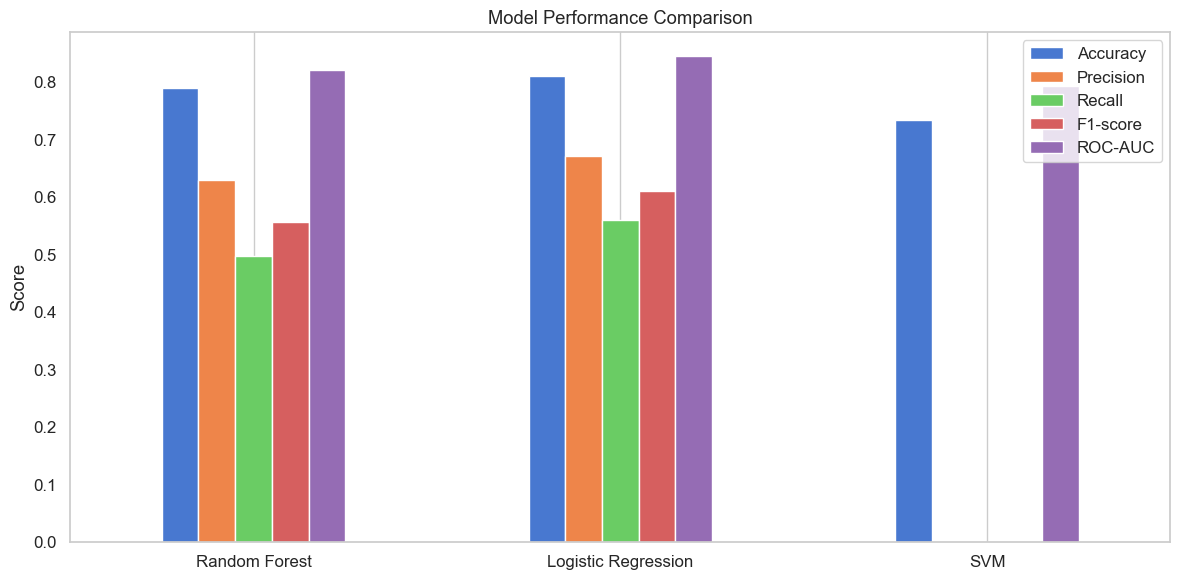

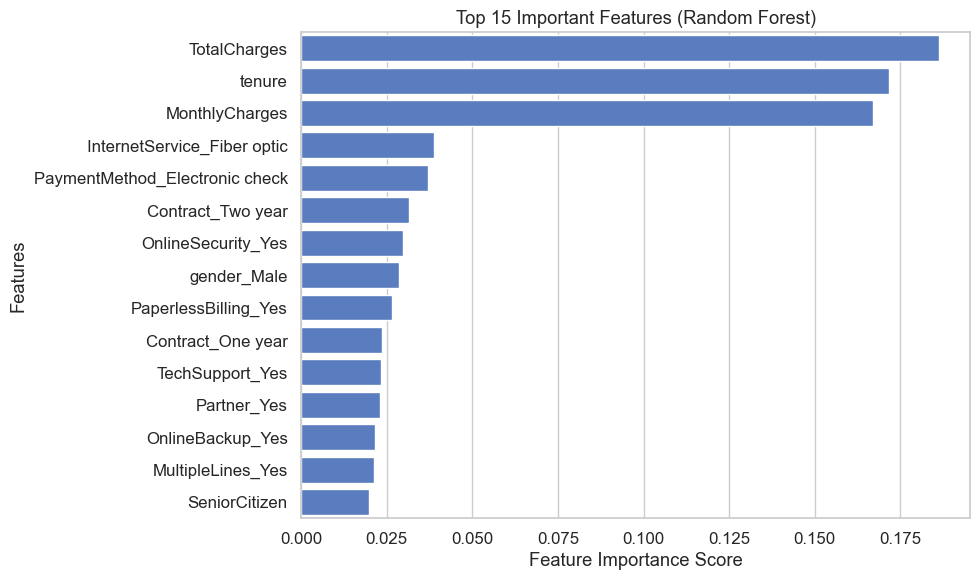

In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import (
    classification_report, roc_auc_score, confusion_matrix,
    accuracy_score, precision_score, recall_score, f1_score
)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Inspect dataset
print(df.head())

# Convert target column "Churn" to numeric (Yes=1, No=0)
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

# Drop customerID (not useful for modelling)
df = df.drop("customerID", axis=1)

# Convert TotalCharges to numeric (some missing/blank values exist)
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)

# Encode categorical variables
categorical_cols = df.select_dtypes(include=["object"]).columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Define features (X) and target (y)
X = df.drop("Churn", axis=1)
y = df["Churn"]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Dictionary to store all results
results = {}

# Initialize models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'SVM': SVC(probability=True, random_state=42)
}

# Train, Predict, and Evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-score': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, y_proba)
    }

    print(f"\nModel: {name}")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

# Compare results in a table
results_df = pd.DataFrame(results).T
print("\n📊 Model Comparison Table:")
print(results_df.sort_values(by="ROC-AUC", ascending=False))

# Plot comparison
results_df.plot(kind='bar', figsize=(12,6), title='Model Performance Comparison')
plt.xticks(rotation=0)
plt.ylabel("Score")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Feature Importance (Random Forest Only)
rf_model = models['Random Forest']
importances = rf_model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

# Top 15 features
top_n = 15
plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices][:top_n], y=features[indices][:top_n])
plt.title("Top 15 Important Features (Random Forest)")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

C:\Users\FUNMILAYO ITUAH\AppData\Local\Temp\ipykernel_19568\1552924508.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)



Model: Random Forest
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1552
           1       0.63      0.50      0.56       561

    accuracy                           0.79      2113
   macro avg       0.73      0.70      0.71      2113
weighted avg       0.78      0.79      0.78      2113

Confusion Matrix:
[[1388  164]
 [ 282  279]]


C:\Users\FUNMILAYO ITUAH\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1552
           1       0.67      0.56      0.61       561

    accuracy                           0.81      2113
   macro avg       0.76      0.73      0.74      2113
weighted avg       0.80      0.81      0.80      2113

Confusion Matrix:
[[1398  154]
 [ 247  314]]


C:\Users\FUNMILAYO ITUAH\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\FUNMILAYO ITUAH\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\FUNMILAYO ITUAH\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.


Model: SVM
              precision    recall  f1-score   support

           0       0.73      1.00      0.85      1552
           1       0.00      0.00      0.00       561

    accuracy                           0.73      2113
   macro avg       0.37      0.50      0.42      2113
weighted avg       0.54      0.73      0.62      2113

Confusion Matrix:
[[1552    0]
 [ 561    0]]

📊 Model Comparison Table:
                     Accuracy  Precision    Recall  F1-score   ROC-AUC
Logistic Regression  0.810222   0.670940  0.559715  0.610301  0.844896
Random Forest        0.788926   0.629797  0.497326  0.555777  0.820065
SVM                  0.734501   0.000000  0.000000  0.000000  0.792760


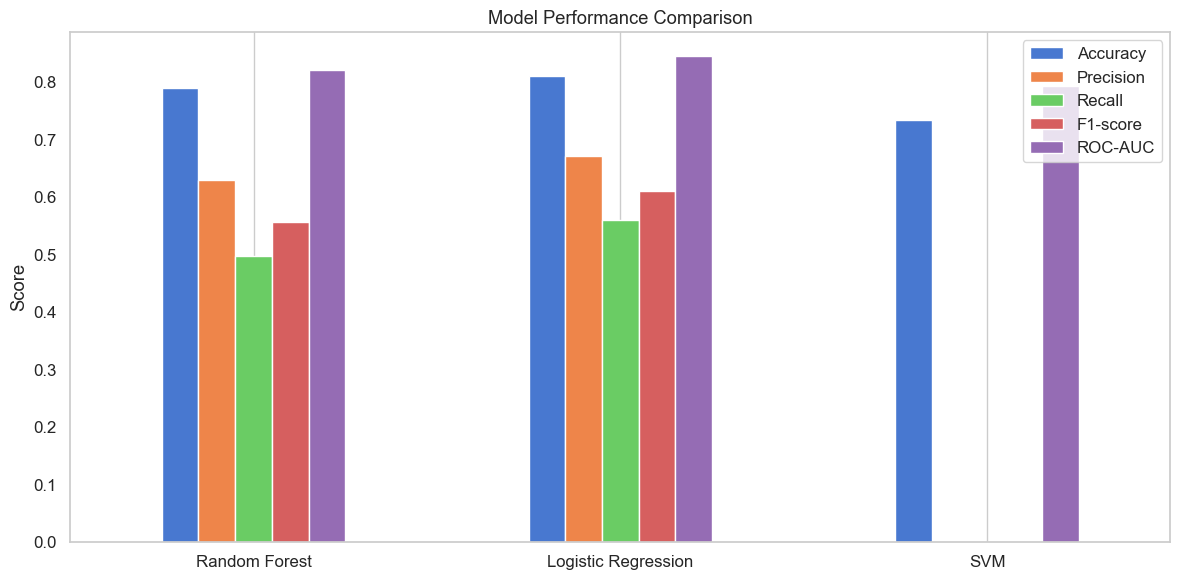

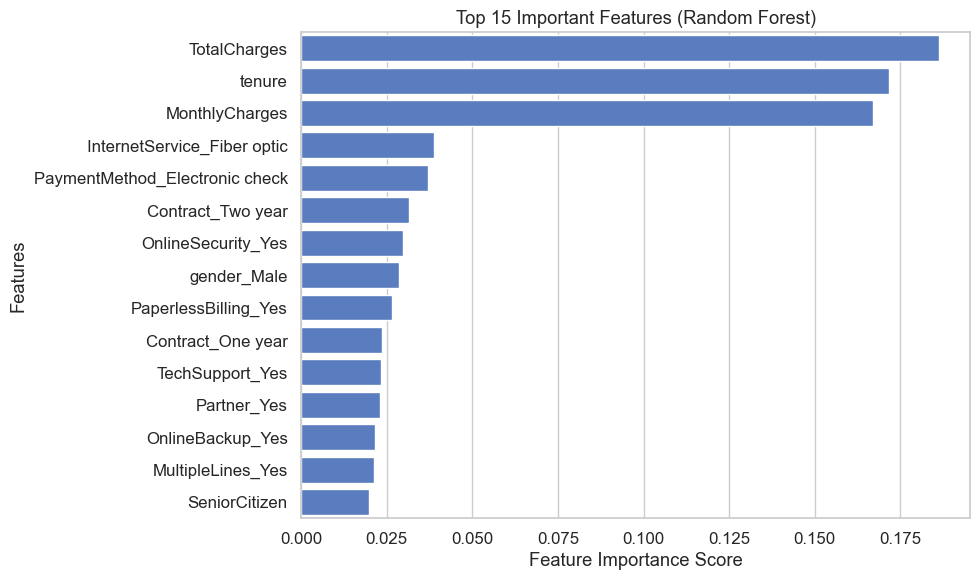

In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import (
    classification_report, roc_auc_score, confusion_matrix,
    accuracy_score, precision_score, recall_score, f1_score
)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Inspect dataset
print(df.head())

# Convert target column "Churn" to numeric (Yes=1, No=0)
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

# Drop customerID (not useful for modelling)
df = df.drop("customerID", axis=1)

# Convert TotalCharges to numeric (some missing/blank values exist)
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)

# Encode categorical variables
categorical_cols = df.select_dtypes(include=["object"]).columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Define features (X) and target (y)
X = df.drop("Churn", axis=1)
y = df["Churn"]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Dictionary to store all results
results = {}

# Initialize models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'SVM': SVC(probability=True, random_state=42)
}

# Train, Predict, and Evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-score': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, y_proba)
    }

    print(f"\nModel: {name}")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

# Compare results in a table
results_df = pd.DataFrame(results).T
print("\n📊 Model Comparison Table:")
print(results_df.sort_values(by="ROC-AUC", ascending=False))

# Plot comparison
results_df.plot(kind='bar', figsize=(12,6), title='Model Performance Comparison')
plt.xticks(rotation=0)
plt.ylabel("Score")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Feature Importance (Random Forest Only)
rf_model = models['Random Forest']
importances = rf_model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

# Top 15 features
top_n = 15
plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices][:top_n], y=features[indices][:top_n])
plt.title("Top 15 Important Features (Random Forest)")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

In [76]:
# === 5. Critical Analysis ===
# K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
cv_scores_rf = cross_val_score(rf_model, X_train, y_train, cv=5)
print("Random Forest CV Accuracy:", cv_scores_rf.mean())

# Hyperparameter Tuning (Grid Search)
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [100, 200], 'max_depth': [5, 10, None]}
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)

# Model Comparison Table
from sklearn.metrics import precision_score, recall_score, f1_score



Random Forest CV Accuracy: 0.7912778904665314
Best parameters: {'max_depth': 10, 'n_estimators': 200}


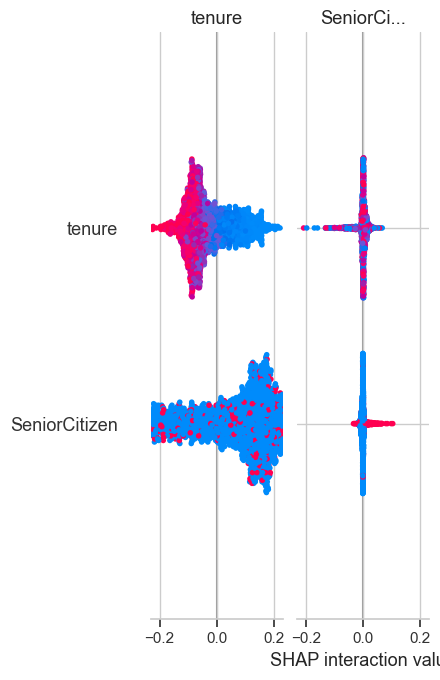

In [57]:
# STEP 11: Explainability with SHAP (Random Forest Example)

explainer = shap.TreeExplainer(best_rf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

In [ ]:
import shap
import matplotlib.pyplot as plt
import pandas as pd

# -----------------------------
# Step 1: Align test data with training features (if necessary)
# -----------------------------
X_test_aligned = X_test.reindex(columns=best_rf.feature_names_in_, fill_value=0)

# -----------------------------
# Step 2: Create SHAP Explainer
# -----------------------------
explainer = shap.Explainer(best_rf, X_test_aligned)

# -----------------------------
# Step 3: Compute SHAP values
# -----------------------------
shap_values = explainer(X_test_aligned)

# -----------------------------
# Step 4: Global Feature Importance
# -----------------------------
# Beeswarm plot
shap.summary_plot(shap_values, X_test_aligned)

# Optional: Bar plot of mean absolute SHAP values
shap.summary_plot(shap_values, X_test_aligned, plot_type="bar")

# -----------------------------
# Step 5: Local Explanation for specific test samples
# -----------------------------
# Initialize JS for interactive force plot
shap.initjs()

# Explain first test sample
shap.force_plot(
    shap_values.base_values[0],  # baseline
    shap_values.values[0],       # SHAP values for first sample
    X_test_aligned.iloc[0]       # feature values
)

# Explain multiple samples (e.g., first 5 customers)
for i in range(5):
    display(shap.force_plot(
        shap_values.base_values[i],
        shap_values.values[i],
        X_test_aligned.iloc[i]
    ))

# -----------------------------
# Step 6: Optional - Feature Importance Table
# -----------------------------
# Mean absolute SHAP values
shap_df = pd.DataFrame({
    "feature": X_test_aligned.columns,
    "mean_abs_shap": np.abs(shap_values.values).mean(axis=0)
}).sort_values(by="mean_abs_shap", ascending=False)

print(shap_df.head(10))  # Top 10 most important features